# Parsing the congress data to get suitable networks

Our dataset include data from the 77th congress met in 1941, to the 117th congress met in 2021 (41 congresses)

________________________________________________________

Import libraries:

In [1]:
import sys
import importlib

sys.path.insert(0, '../local/bin')

import edgelist_creation
from edgelist_creation import *

In [2]:
import pandas as pd
import networkx as nx
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import LineString

In [3]:
importlib.reload(edgelist_creation)

<module 'edgelist_creation' from '/home/leonardo/projects/USA_Congress_SigNet/notebooks/../local/bin/edgelist_creation.py'>

___________________________________________________

## Load data and exploratory analysis

In [4]:
members = pd.read_csv('../dataset/HSall_members.csv')			# Congressmen from G. Washington to D. Trump
party_codes = pd.read_csv('../dataset/HSall_parties.csv')		# Parties to map party_code to party_name

In [5]:
print('Members shape: ', members.shape)
members.head(3)

Members shape:  (50485, 22)


,congress,chamber,icpsr,state_icpsr,district_code,state_abbrev,party_code,occupancy,last_means,bioname,...,died,nominate_dim1,nominate_dim2,nominate_log_likelihood,nominate_geo_mean_probability,nominate_number_of_votes,nominate_number_of_errors,conditional,nokken_poole_dim1,nokken_poole_dim2
0,1,President,99869,99,0.0,USA,5000,NaN,NaN,"WASHINGTON, George",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,House,379,44,2.0,GA,4000,0.0,1.0,"BALDWIN, Abraham",...,1807.0,-0.165,-0.373,-28.55029,0.758,103.0,12.0,NaN,-0.429,-0.817
2,1,House,4854,44,1.0,GA,4000,0.0,1.0,"JACKSON, James",...,1806.0,-0.320,-0.181,-24.89986,0.776,98.0,9.0,NaN,-0.559,-0.052


In [6]:
print('Party codes shape: ', party_codes.shape)
party_codes.head(3)

Party codes shape:  (840, 9)


,congress,chamber,party_code,party_name,n_members,nominate_dim1_median,nominate_dim2_median,nominate_dim1_mean,nominate_dim2_mean
0,1,President,5000,Pro-Administration,1,NaN,NaN,NaN,NaN
1,1,House,4000,Anti-Administration,29,0.018,0.092,-0.024379,0.141931
2,1,House,5000,Pro-Administration,31,0.576,0.004,0.513161,-0.009484


Let's analyze the example of the 77th Congress (1941-1943), met under the presidency of Franklin D. Roosevelt

In [7]:
n_congress_ex = '077'

In [8]:
congress_nnn = pd.read_csv('../dataset/download_votes_merged/congress_' + n_congress_ex + '.csv')
congress_nnn.head(3)

,bill_number,id,description,chamber,date,vote_desc,vote_result,congress,rollnumber,Peltzman,Clausen,name,party_short_name,icpsr,vote
0,HR3,RH0770071,"TO STRIKE THE ENACTING CLAUSE OF H.R. 3, A BIL...",House,1941-11-18,NaN,NaN,77,71,Domestic Social Policy,Social Welfare,"ROOSEVELT, Franklin Delano",Democrat,99899,Abs
1,HR3,RH0770071,"TO STRIKE THE ENACTING CLAUSE OF H.R. 3, A BIL...",House,1941-11-18,NaN,NaN,77,71,Domestic Social Policy,Social Welfare,"BOYKIN, Frank William",Democrat,937,Abs
2,HR3,RH0770071,"TO STRIKE THE ENACTING CLAUSE OF H.R. 3, A BIL...",House,1941-11-18,NaN,NaN,77,71,Domestic Social Policy,Social Welfare,"GRANT, George McInvale",Democrat,3754,Abs


In [9]:
print('Number of votes: ', len(set(congress_nnn['id'])))
print('Number of members: ', len(set(congress_nnn['name'])))
print('File length: ', len(congress_nnn))

Number of votes:  152
Number of members:  455
File length:  65610


Let's see a couple of plots about alll the congresses:

In [41]:
congress_path = '../dataset/download_votes_merged/*'	# Path to all congresses files

 78%|███████▊  | 32/41 [00:20<00:06,  1.41it/s]/home/leonardo/projects/USA_Congress_SigNet/notebooks/../local/bin/edgelist_creation.py:22: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  res[congress] = len(set(pd.read_csv(csv)['id']))                                        # count the number of unique votes in the file and store it in a dictionary
100%|██████████| 41/41 [00:29<00:00,  1.41it/s]


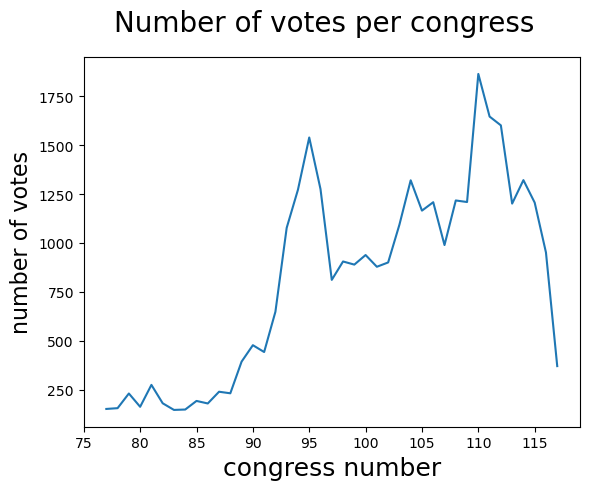

In [11]:
plot_votes = plot_votes_per_congress(congress_path)

 78%|███████▊  | 32/41 [00:21<00:08,  1.12it/s]/home/leonardo/projects/USA_Congress_SigNet/notebooks/../local/bin/edgelist_creation.py:44: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  res[congress] = len(set(pd.read_csv(csv)['name']))
100%|██████████| 41/41 [00:31<00:00,  1.32it/s]


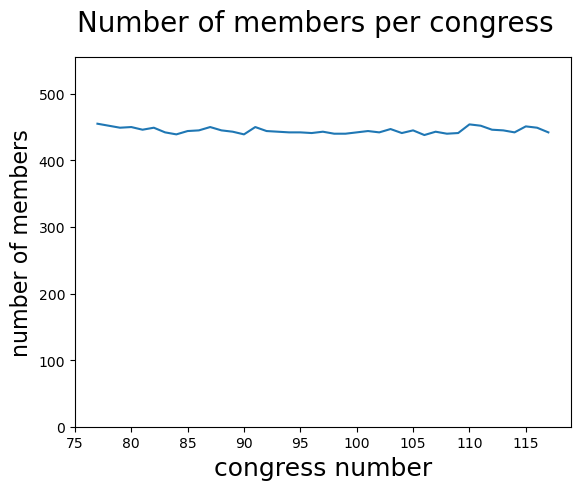

In [12]:
plot_members = plot_members_per_congress(congress_path)

create a dataframe that contains some information for every politician who has been in the US Congress for at least one time.
For example, we have a list of all the congresses he has been part of and all the parties he has been in.

In [13]:
members_info = create_members_df(members, party_codes)
members_info.head(10)

,icpsr,congress,party_code,bioname,state_abbrev,party_name
0,1,[82],[200],"AANDAHL, Fred George",ND,[Republican]
1,2,"[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 9...",[100],"ABBITT, Watkins Moorman",VA,[Democrat]
2,3,"[28, 29, 30]",[29],"ABBOTT, Amos",MA,[Whig]
3,4,"[50, 51, 52, 53, 54]",[100],"ABBOTT, Jo (Joseph)",TX,[Democrat]
4,5,"[15, 16, 17, 18]","[7777, 13]","ABBOT, Joel",GA,"[Crawford Republican, Democrat-Republican]"
5,6,"[40, 41]",[200],"ABBOTT, Joseph Carter",NC,[Republican]
6,7,[44],[100],"ABBOTT, Josiah Gardner",MA,[Democrat]
7,8,[35],[200],"ABBOTT, Nehemiah",ME,[Republican]
8,9,[83],[200],"ABEL, Hazel Hempel",NE,[Republican]
9,10,"[32, 33]",[29],"ABERCROMBIE, James",AL,[Whig]


Create three dictionaries: one that links a member (using his icpsr) to his party, one that links a member to his state, one that links a member to the congresses he has been part of.

In [14]:
member_party_dict = members_info.set_index('icpsr')['party_name'].to_dict()		# member_id -> party_name
member_state_dict = members_info.set_index('icpsr')['state_abbrev'].to_dict()	# member_id -> state_abbreviation
member_congress_dict = members_info.set_index('icpsr')['congress'].to_dict()	# member_id -> congress

### Check vote themes

in case we would use the topic of the vote, we have two categories: "Clausen categories" and "Peltzman categories", we cn retrienve them from the data of the congresses. It is known from https://voteview.com/articles/issue_codes that the Peltzman categories are 13 and the Clausen categories are 6.

#### Clausen Categories

- **Government Management:**
  Environmental control; government regulation of business; natural resource management; government ownership of business; government control of the economy; budget balancing; tax policy; interest rates; management of the bureaucracy; etc.

- **Social Welfare:**
  Social security; public housing; urban renewal; labor regulation; education; urban affairs; employment opportunities and rewards; welfare; medicare; unemployment; minimum wage; legal services; immigration, etc.

- **Agriculture:**
  Price supports and subsidies; commodity control; acreage limitations; etc.

- **Civil Liberties:**
  Civil rights; equality; criminal procedure; privacy; guarantees of the Bill of Rights; slavery; Hatch Act; etc.

- **Foreign and Defense Policy:**
  International policy; foreign aid; aid to international organizations; armament policy; defense procurement; international trade; military pensions; etc.

- **Miscellaneous Policy:**
  Unclassifiable or unidentifiable votes; all votes concerned with the internal organization of Congress; procedural motions.

#### Peltzman Categories

- **Budget General Interest:**
  Debt limit; budget targets; revenue sharing; unemployment insurance; tax rates; continuing appropriations; etc.

- **Budget Special Interest:**
  Authorization/appropriations for agencies, departments; public works; subsidized housing; NSF; parks; food stamps; etc.

- **Regulation General Interest:**
  General tariffs; minimum wage; gasoline rationing; auto emissions; water pollution; etc.

- **Regulation Special Interest:**
  Union regulations; coal mine regulations; export/import controls; fish and wildlife; etc.

- **Domestic Social Policy:**
  Abortion; school prayer; busing; criminal code and federal courts; immigration; gun control; Hatch Act; veterans preference; Legal Services Corporation; voting rights; slavery; etc.

- **Defense Policy Budget:**
  Authorization/appropriations for the military; military pensions.

- **Defense Policy Resolutions:**
  Number of Army divisions; duties of officers; etc.

- **Foreign Policy Budget:**
  Authorization/appropriations for the State Department and international organizations; etc.

- **Foreign Policy Resolutions:**
  Condemn/thank foreign nations; Taiwan relations; disapproval of apartheid; etc.

- **Government Organization:**
  Setting up new agencies/bureaus/commissions; civil service regulations; government reorganization; Federal Election Commission; constitutional amendments; admission of States; census; etc.

- **Internal Organization:**
  Election of Speaker; party ratios on committees; creating committees; procedural rules; disputed elections; congressional pay; etc.

- **Indian Affairs:**
  Indian treaties; appropriations for the Indian Department; Indian lands and reservations; etc.

- **D. C.:**
  All votes dealing with the District of Columbia.

Not many information about the categories are available, one can suppose that the Pelzman categories are more detailed than the Clausen ones, but we can check whether Peltzman categories actually represent a finer classification than Clausen ones.

In [15]:
congress_path_senate = '../dataset/download_votes_merged_senate/*'	# Path to all congresses files

In [42]:
# Initialize a weighted bipartite graph
G = nx.Graph()

# Iterate through each CSV file
for csv_file in tqdm(glob.glob(congress_path)):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file)
    
    # Count the occurrences of each pair of Clausen and Peltzman categories
    counts = df.groupby(["Clausen", "Peltzman"]).size().reset_index(name="count")
    
    # Add edges to the graph with weights based on the counts
    for _, row in counts.iterrows():
        clausen_category = row["Clausen"]
        peltzman_category = row["Peltzman"]
        count = row["count"]
        
        G.add_node(clausen_category, bipartite=0)
        G.add_node(peltzman_category, bipartite=1)
        G.add_edge(clausen_category, peltzman_category, weight=count)

# Now you have a weighted bipartite graph (G) with edges representing the co-occurrences
# between Clausen and Peltzman categories and weights representing the number of occurrences.

 78%|███████▊  | 32/41 [00:27<00:08,  1.03it/s]/tmp/ipykernel_24809/3165551236.py:7: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
100%|██████████| 41/41 [00:38<00:00,  1.06it/s]


Check Clausen and Peltzman categories we retrieve

In [48]:
print('Clausen categories: ', [n for n in G.nodes() if G.nodes[n]['bipartite'] == 0])
print('Number of Clausen categories: ', len([n for n in G.nodes() if G.nodes[n]['bipartite'] == 0]))

print('Peltzman categories: ', [n for n in G.nodes() if G.nodes[n]['bipartite'] == 1])
print('Number of Peltzman categories: ', len([n for n in G.nodes() if G.nodes[n]['bipartite'] == 1]))

Clausen categories:  ['Agriculture', 'Civil Liberties', 'Foreign and Defense Policy', 'Government Management', 'Miscellaneous Policy', 'Social Welfare']
Number of Clausen categories:  6
Peltzman categories:  ['Budget Special Interest', 'Regulation General Interest', 'Regulation Special Interest', 'Domestic Social Policy', 'Defense Policy Budget', 'Defense Policy Resolutions', 'Foreign Policy Budget', 'Foreign Policy Resolutions', 'Budget General Interest', 'D. C.', 'Government Organization', 'Indian Affairs', 'Internal Organization']
Number of Peltzman categories:  13


In [ ]:
from matplotlib.lines import Line2D

In [ ]:
# Function to scale the edge weights for edge thickness
def scale_edge_weights(weight_values, max_thickness=4):
    max_weight = max(weight_values)
    if max_weight == 0:
        return [0] * len(weight_values)
    return [max_thickness * w / max_weight for w in weight_values]

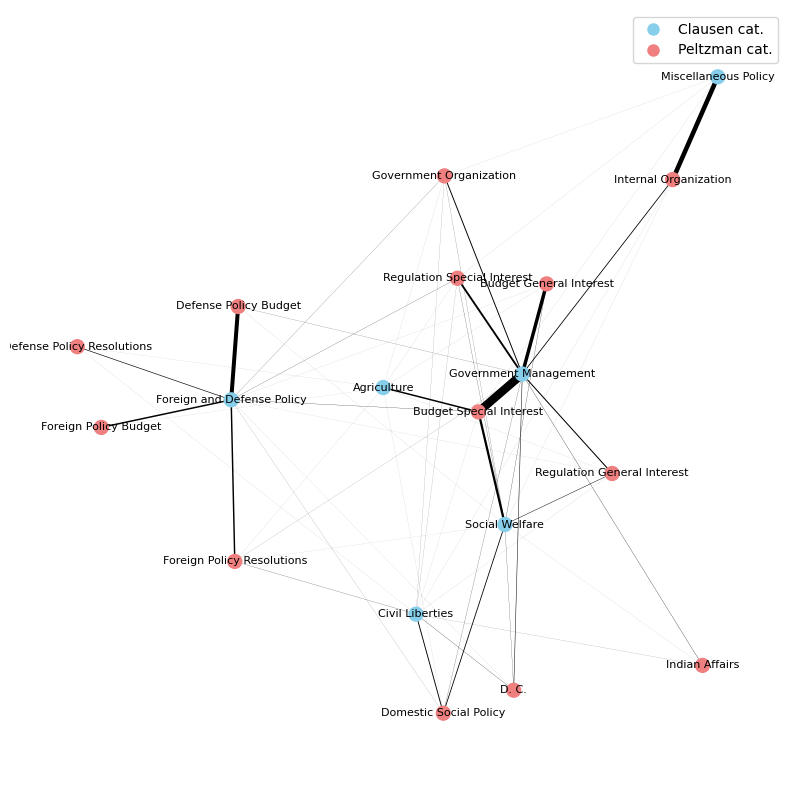

In [89]:
def scale_edge_weights(weight_values, max_thickness=6):
    max_weight = max(weight_values)
    if max_weight == 0:
        return [0] * len(weight_values)
    return [max_thickness * w / max_weight for w in weight_values]

edge_color = 'black'  # Change this to any color you prefer

node_colors = [0 if G.nodes[n]['bipartite'] == 0 else 1 for n in G.nodes()]
node_colors = ['skyblue' if color == 0 else 'lightcoral' for color in node_colors]  # Choose node colors

edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
edge_thickness = scale_edge_weights(edge_weights)

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.3)  # Apply spring layout with modified parameters
nx.draw_networkx_nodes(G, pos=pos, node_color=node_colors, node_size=100)
nx.draw_networkx_edges(G, pos=pos, width=edge_thickness, edge_color=edge_color)
nx.draw_networkx_labels(G, pos=pos, font_size=8)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='skyblue', markersize=10, label='Clausen cat.'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightcoral', markersize=10, label='Peltzman cat.')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.axis('off')
plt.show()

________________________________________________________________